# Task - 3

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [5]:
file_name ="SampleSuperstore.csv"
df = pd.read_csv(file_name)
df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [6]:
df = df.drop(["Country","Postal Code"],axis=1)
df.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [7]:
df.dtypes

Ship Mode        object
Segment          object
City             object
State            object
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [8]:
df.isnull().values.any()

False

In [9]:
df.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


C:\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Number of orders for each Ship Mode'}, xlabel='Ship Mode', ylabel='count'>

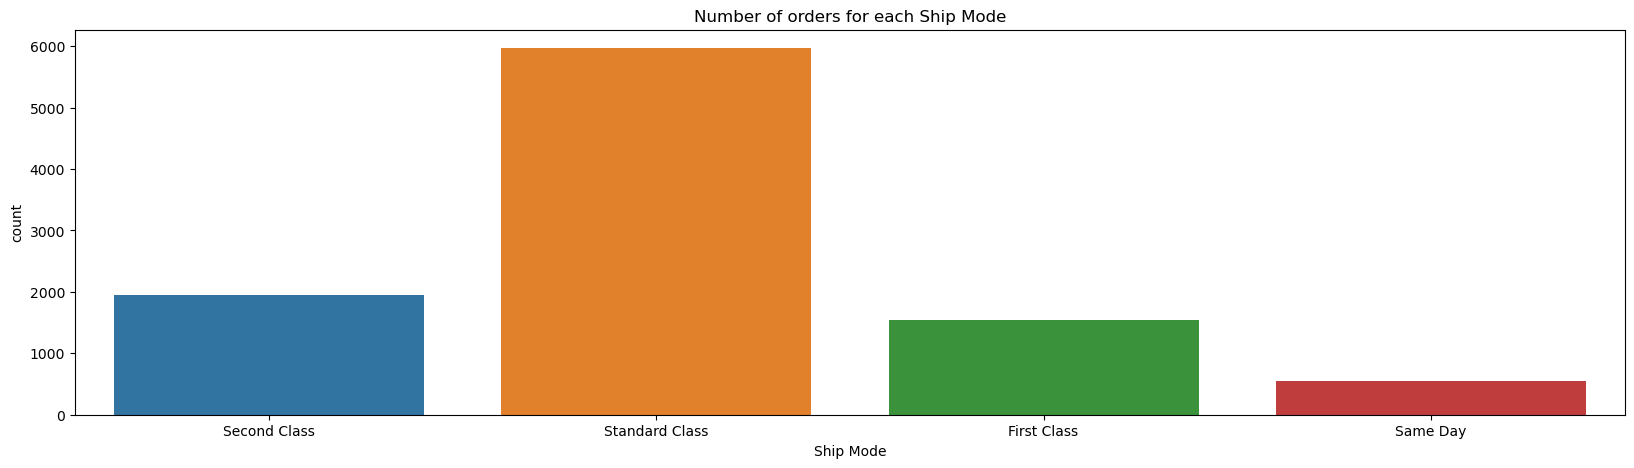

In [10]:
plt.figure(figsize=(20,5))
plt.title("Number of orders for each Ship Mode")
sns.countplot(df['Ship Mode'],label="Count")

<AxesSubplot:title={'center':'Ship mode and their sales'}, xlabel='Ship Mode', ylabel='Sales'>

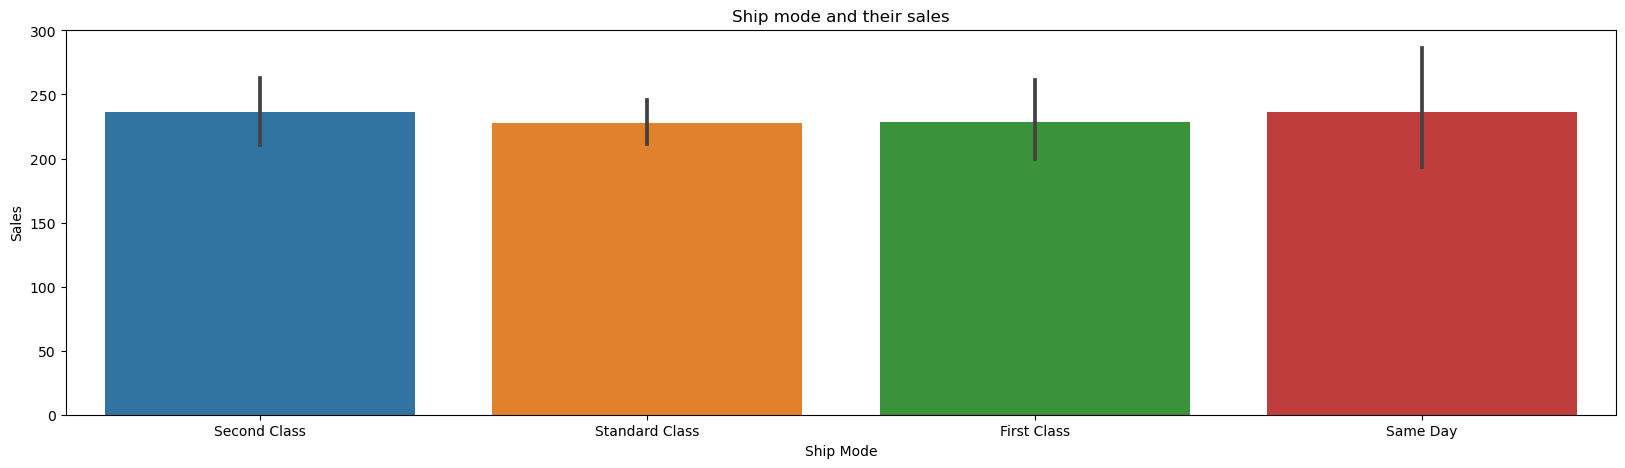

In [11]:
plt.figure(figsize=(20,5))
plt.title("Ship mode and their sales")
sns.barplot(x = df['Ship Mode'] , y = df["Sales"])

<AxesSubplot:title={'center':'Ship mode and their profit'}, xlabel='Ship Mode', ylabel='Profit'>

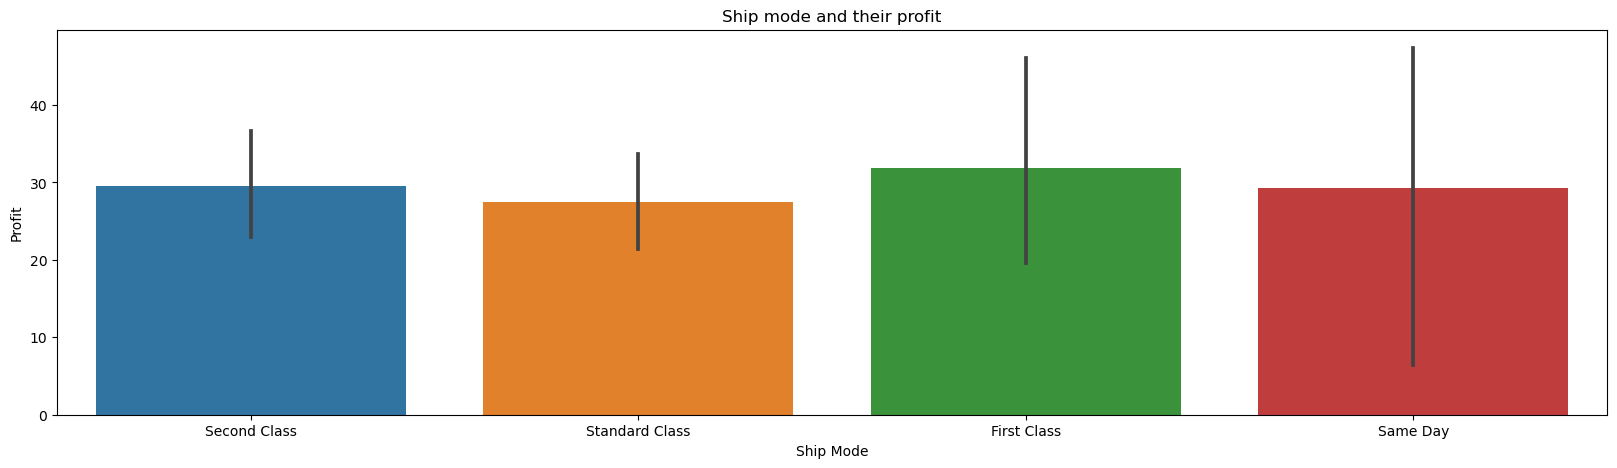

In [12]:
plt.figure(figsize=(20,5))
plt.title("Ship mode and their profit")
sns.barplot(x = df['Ship Mode'] , y = df["Profit"])

C:\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Number of orders for each segment'}, xlabel='Segment', ylabel='count'>

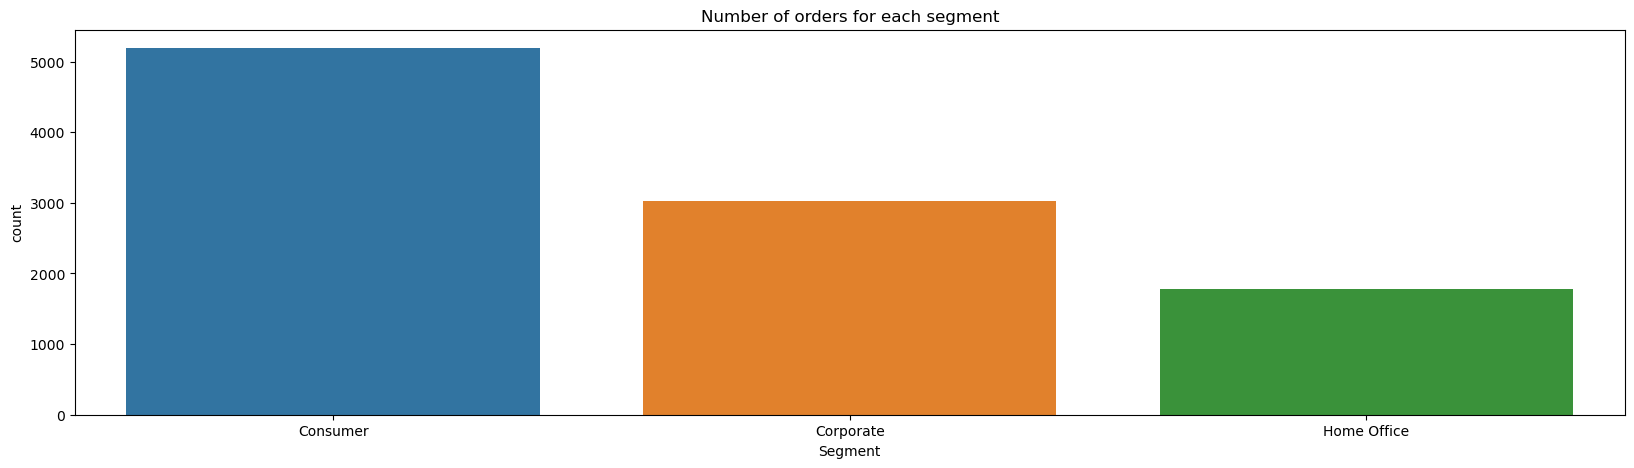

In [13]:
plt.figure(figsize=(20,5))
plt.title("Number of orders for each segment")
sns.countplot(df['Segment'],label="Count")

<AxesSubplot:title={'center':'Segment and their sales'}, xlabel='Segment', ylabel='Sales'>

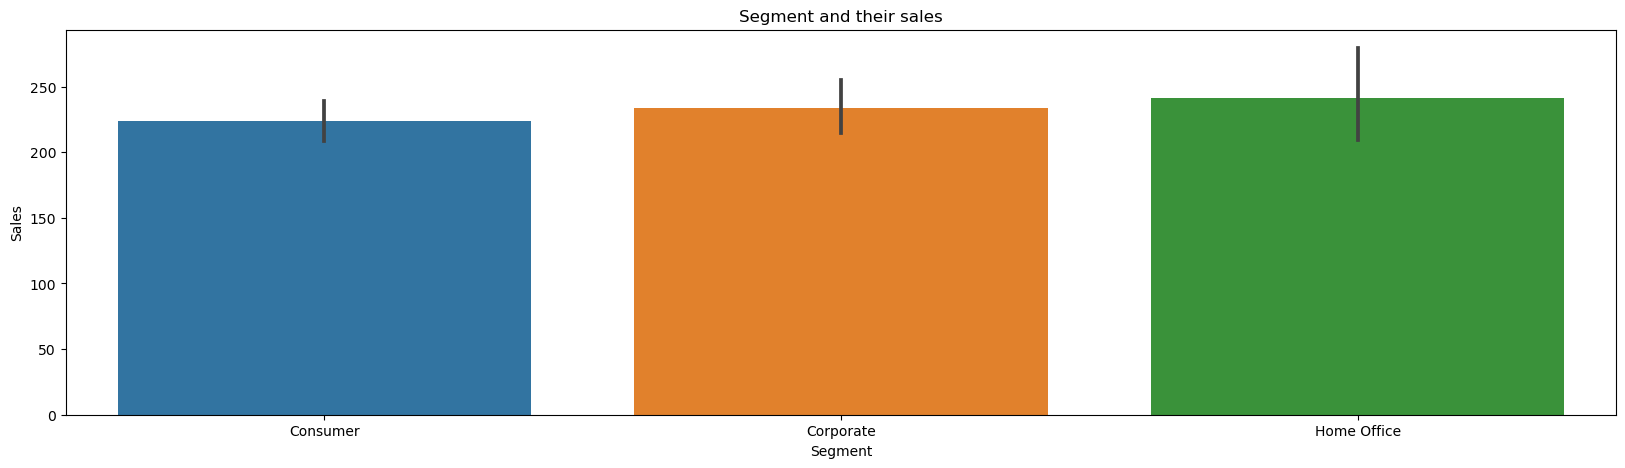

In [14]:
plt.figure(figsize=(20,5))
plt.title("Segment and their sales")
sns.barplot(x = df['Segment'] , y = df["Sales"])

In [15]:
# We will calculate sum of top ten sales of the company
Top_10_sales= df.groupby("State").Sales.sum().nlargest(n=10)
Top_10_sales

State
California      457687.6315
New York        310876.2710
Texas           170188.0458
Washington      138641.2700
Pennsylvania    116511.9140
Florida          89473.7080
Illinois         80166.1010
Ohio             78258.1360
Michigan         76269.6140
Virginia         70636.7200
Name: Sales, dtype: float64

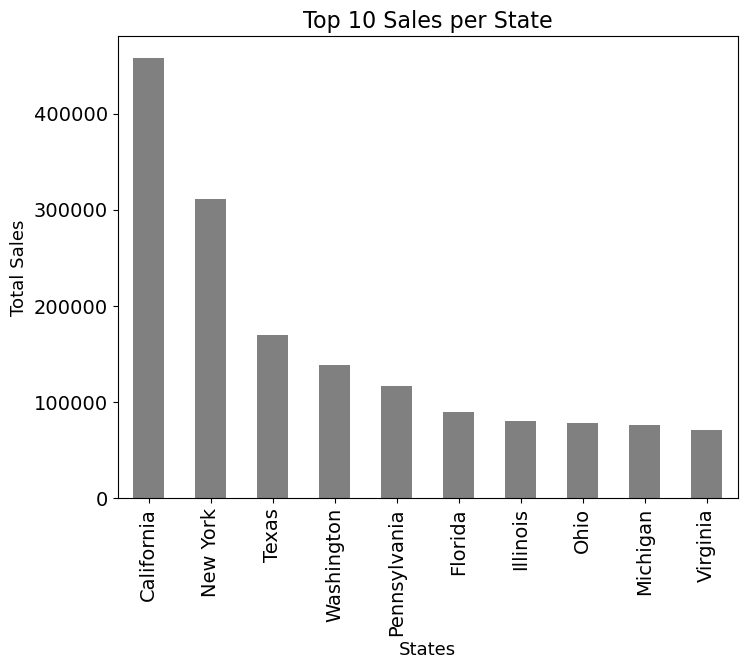

In [16]:
# we will plot graph of top 10 Sales of company
plt.figure(figsize = (10, 7))
plt.style.use('grayscale')
Top_10_sales.plot(kind ='bar',color="gray",figsize =(8,6), fontsize =14)
plt.xlabel("States", fontsize =13)
plt.ylabel("Total Sales",fontsize =13)
plt.title('Top 10 Sales per State',fontsize =16)
plt.show()

In [17]:
# We will calculate sum of top ten Profit of the company
Top_10_profit = df.groupby("State").Profit.sum().nlargest(n=10)
Top_10_profit

State
California    76381.3871
New York      74038.5486
Washington    33402.6517
Michigan      24463.1876
Virginia      18597.9504
Indiana       18382.9363
Georgia       16250.0433
Kentucky      11199.6966
Minnesota     10823.1874
Delaware       9977.3748
Name: Profit, dtype: float64

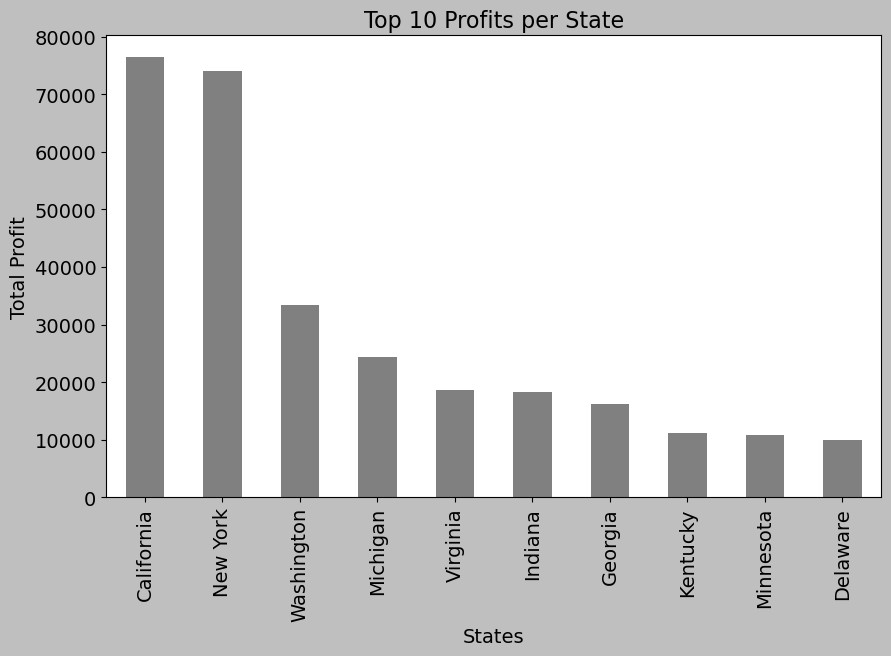

In [18]:
# we will plot graph of top 10 Profit of company
Top_10_profit.plot(kind ='bar',color="gray", figsize =(10,6), fontsize =14)
plt.xlabel("States", fontsize =14)
plt.ylabel("Total Profit",fontsize =14)
plt.title("Top 10 Profits per State",fontsize =16)
plt.show()

In [19]:
# we will find the correlation between entries in our data
df.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


<AxesSubplot:>

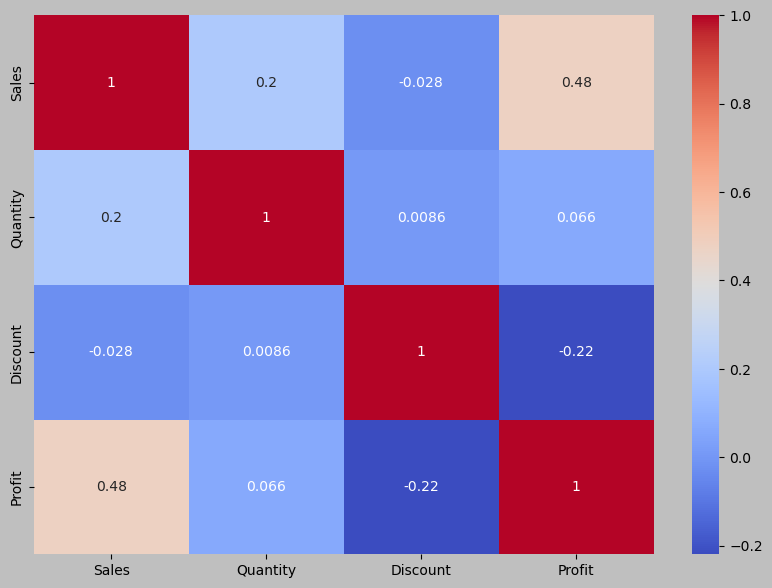

In [20]:
# We will plot the correlation graph
plt.figure(figsize = (10, 7))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

In [21]:
# We will make count on the basis of category
df2=df['Category'].value_counts()
df2

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

<AxesSubplot:xlabel='Category', ylabel='count'>

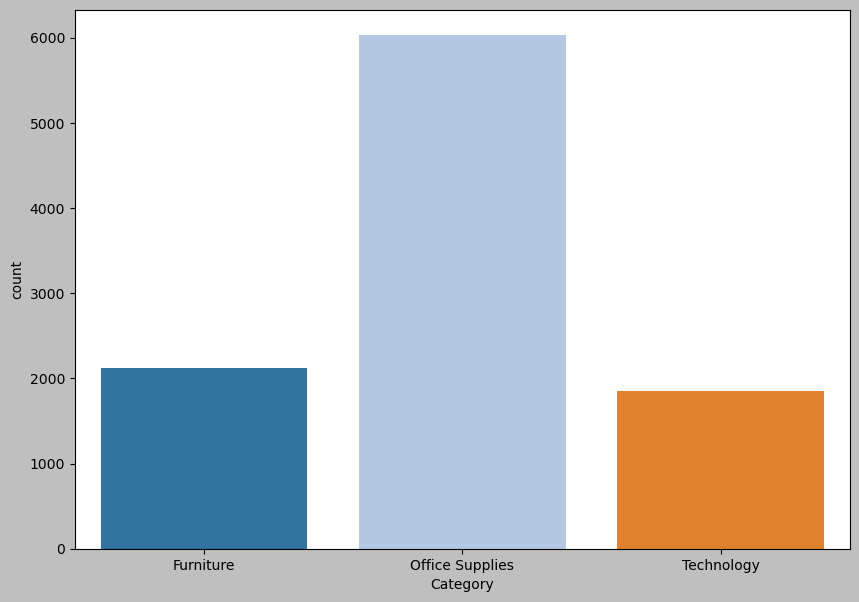

In [22]:
# we will plot countplot on the basis of category
plt.figure(figsize = (10, 7))
sns.countplot(x='Category',data=df,palette='tab20')

In [23]:
# We will make count on the basis of Sub-category
df['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

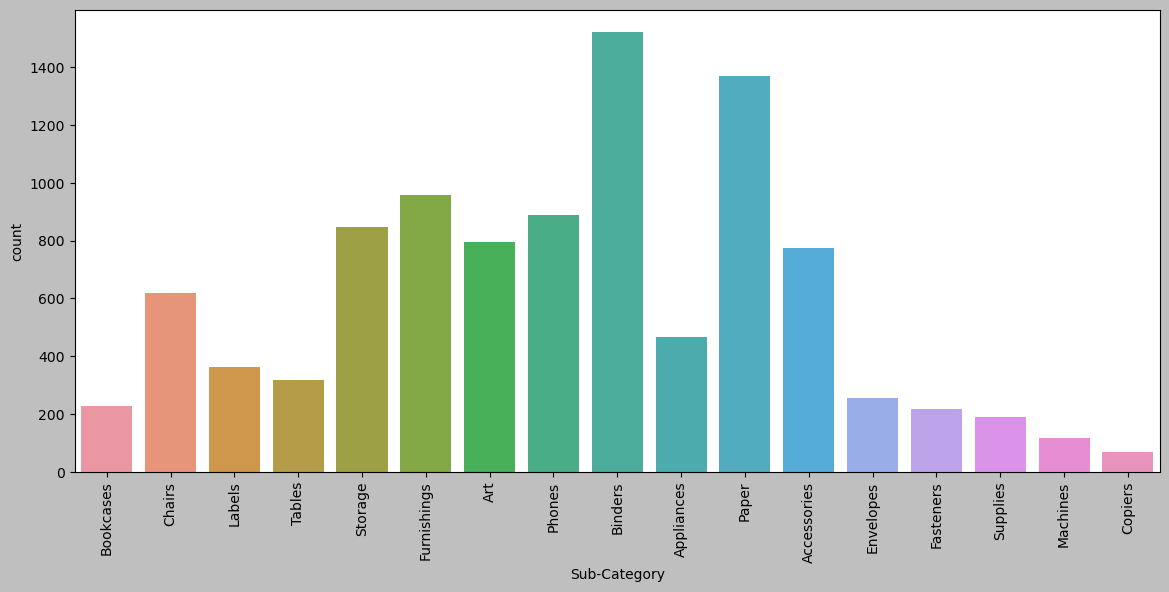

In [24]:
# we will plot countplot on the basis of Sub-category
plt.figure(figsize=(14,6))
sns.countplot(x=df['Sub-Category'])
plt.xticks(rotation=90)
plt.show()

In [25]:
# We will calculate the sum of Profit based on Category
df.groupby(['Category'])['Profit'].sum()

Category
Furniture           18451.2728
Office Supplies    122490.8008
Technology         145454.9481
Name: Profit, dtype: float64

<AxesSubplot:xlabel='Category', ylabel='Profit'>

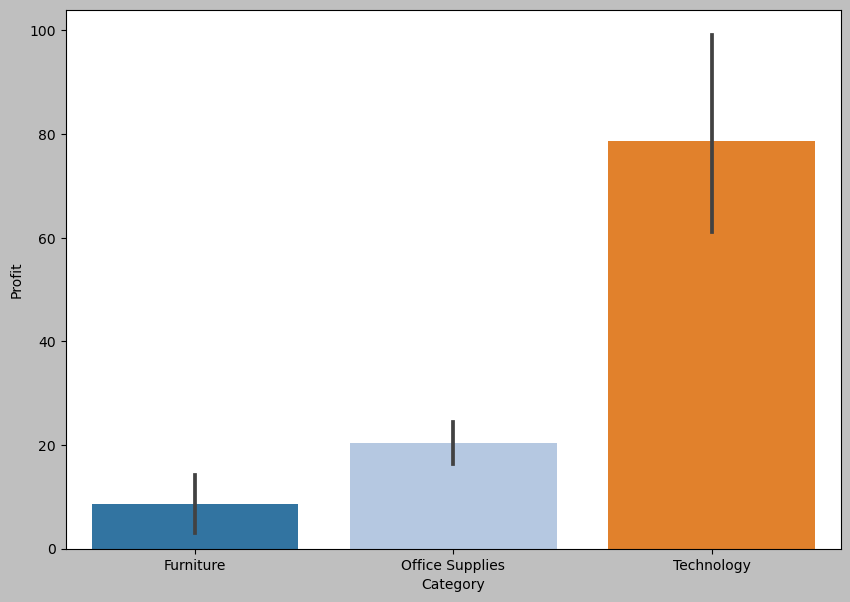

In [26]:
# We will plot barplot of Category in terms of Profit
plt.figure(figsize = (10, 7))
sns.barplot(x='Category',y='Profit',data=df,palette='tab20')

In [27]:
# We will calculate the sum of Discount based on Category
df.groupby(['Category'])['Discount'].sum()

Category
Furniture          368.89
Office Supplies    947.80
Technology         244.40
Name: Discount, dtype: float64

<AxesSubplot:xlabel='Category', ylabel='Discount'>

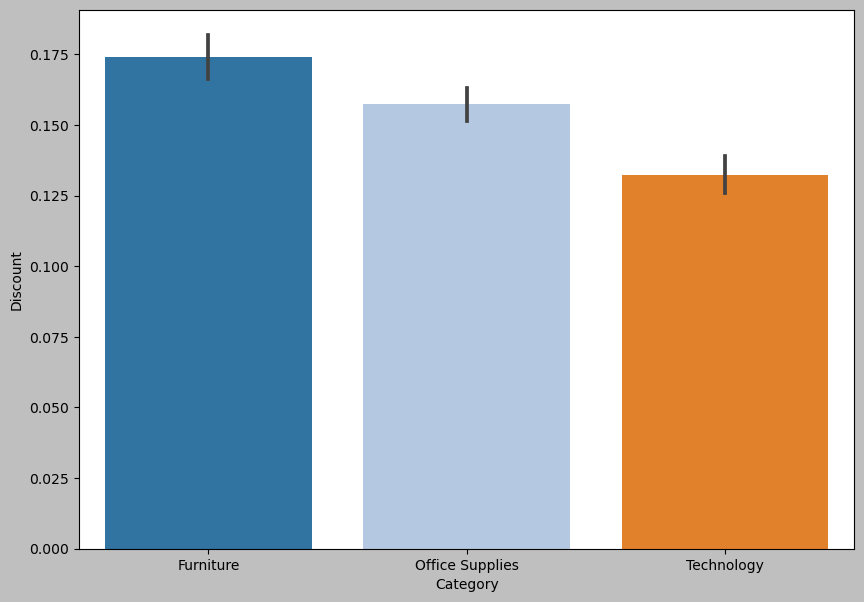

In [28]:
# We will plot barplot of Category in terms of Discount
plt.figure(figsize = (10, 7))
sns.barplot(x='Category',y='Discount',data=df,palette='tab20')

In [29]:
# We will calculate the sum of Sales based on Category
df.groupby(['Category'])['Sales'].sum()

Category
Furniture          741999.7953
Office Supplies    719047.0320
Technology         836154.0330
Name: Sales, dtype: float64

<AxesSubplot:xlabel='Category', ylabel='Sales'>

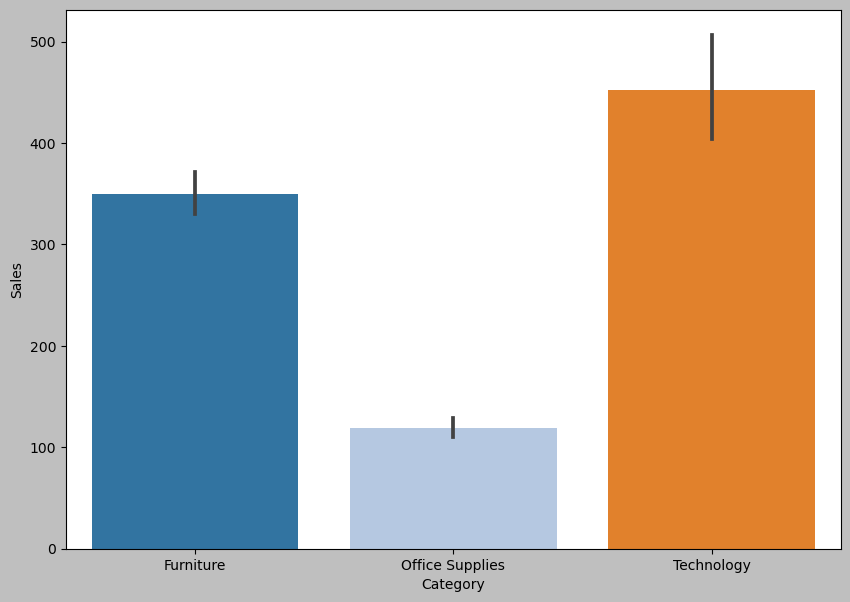

In [30]:
# We will plot barplot of Category in terms of Sales
plt.figure(figsize = (10, 7))
sns.barplot(x='Category',y='Sales',data=df,palette='tab20')

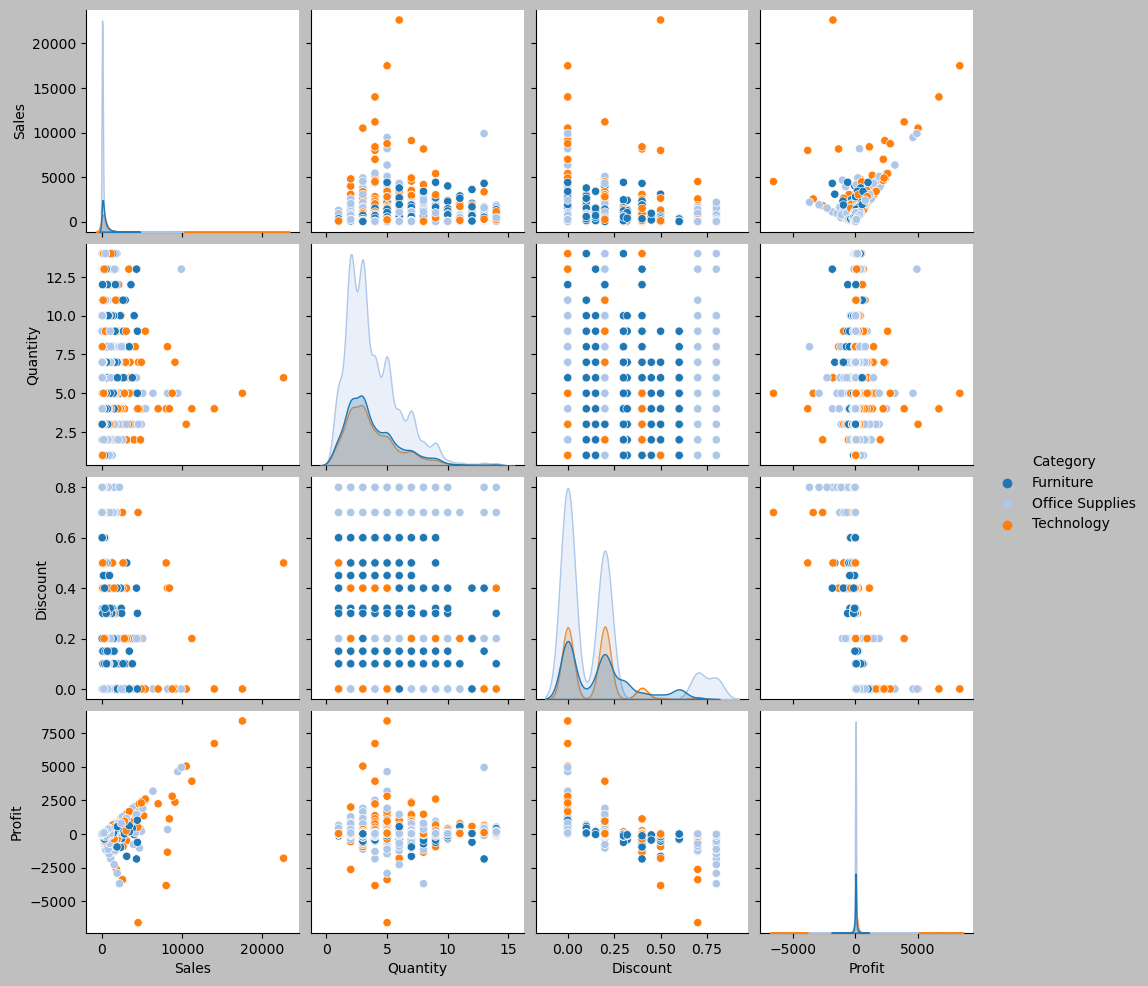

In [31]:
# We will plot Pairplot on the basis of Category
sns.pairplot(df,hue='Category',palette='tab20')

In [32]:
#We will calculate sum,mean,count, median,standard deviation,Variance of each states of Profit
df.groupby("State").Profit.agg(["sum","mean",'median','std','count','var']).head()

,sum,mean,median,std,count,var
State,,,,,,
Alabama,5786.8253,94.865989,16.87500,210.901876,61,44479.601429
Arizona,-3427.9246,-15.303235,2.53365,109.266267,224,11939.117124
Arkansas,4008.6871,66.811452,18.34080,123.249880,60,15190.532873
California,76381.3871,38.171608,13.30560,97.691593,2001,9543.647400
Colorado,-6527.8579,-35.867351,3.12480,276.424024,182,76410.240842


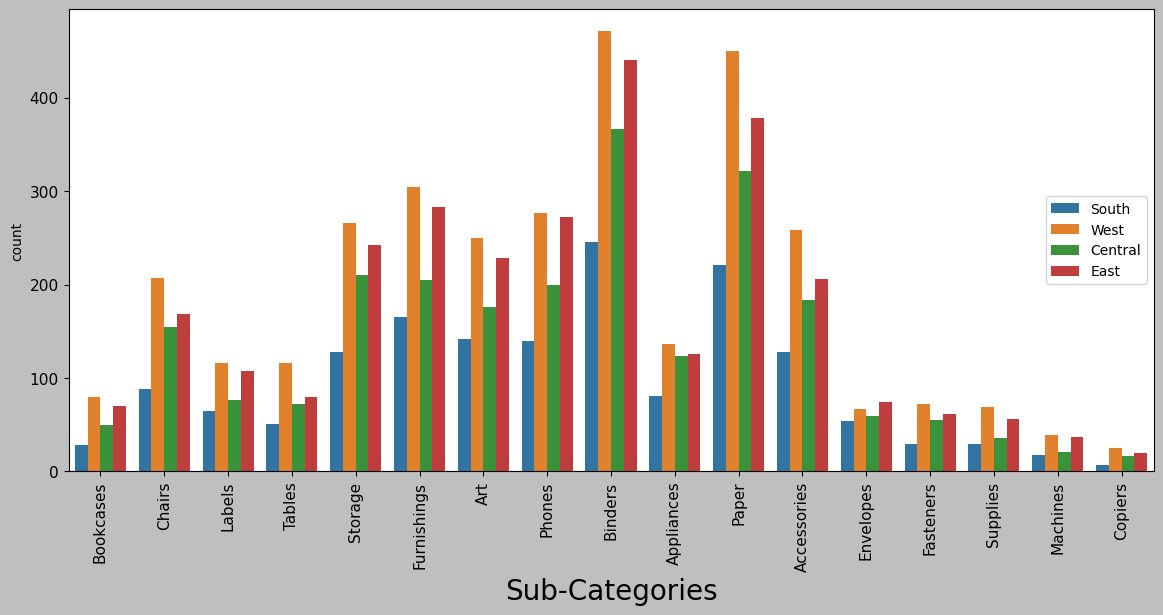

In [33]:
# We will plot countplot of Sub-Categoreis as per the Region
plt.figure(figsize = (14, 6))
sns.countplot(x = 'Sub-Category', hue = 'Region', data = df, palette ='tab10')
plt.xticks(rotation = 90, fontsize = 11)
plt.yticks(fontsize = 11)
plt.xlabel('Sub-Categories',fontsize = 20)
plt.legend(loc = 5, fontsize = 10)
plt.show()

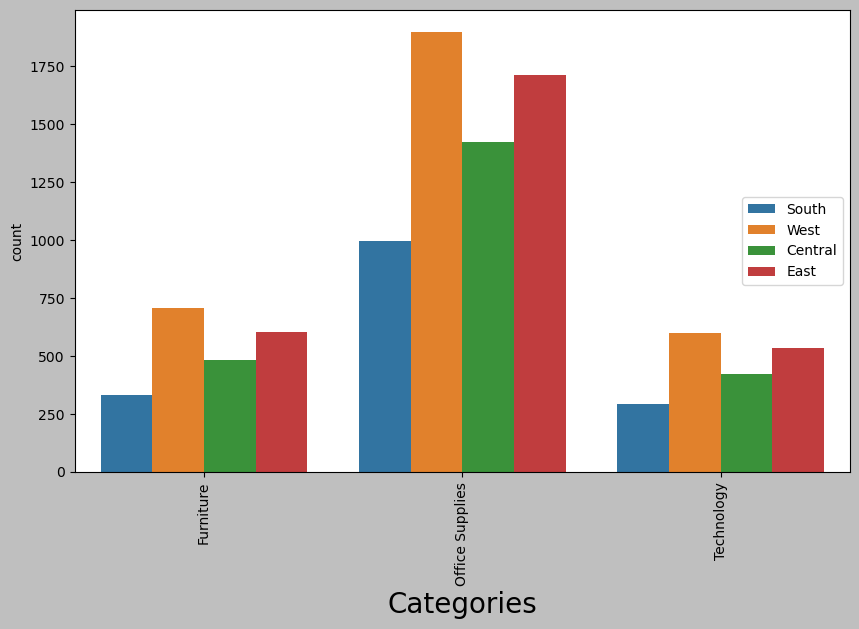

In [34]:
# We will plot countplot of Sub-Categoreis as per the Region
plt.figure(figsize = (10, 6))
sns.countplot(x = 'Category', hue = 'Region', data = df, palette = 'tab10')
plt.xticks(rotation = 90, fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Categories',fontsize = 20)
plt.legend(loc = 5, fontsize = 10)
plt.show()

<AxesSubplot:xlabel='Segment', ylabel='count'>

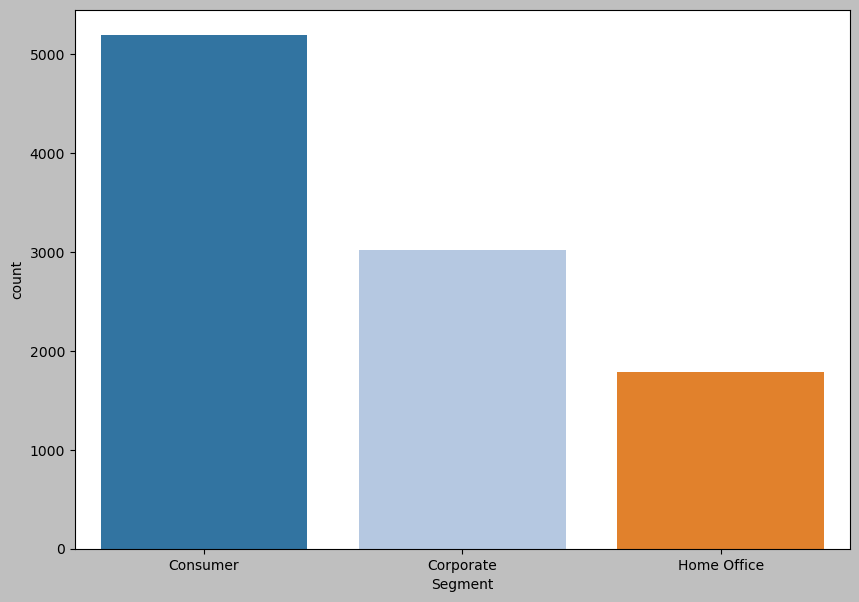

In [35]:
plt.figure(figsize = (10, 7))
sns.countplot(x = df["Segment"],palette='tab20')

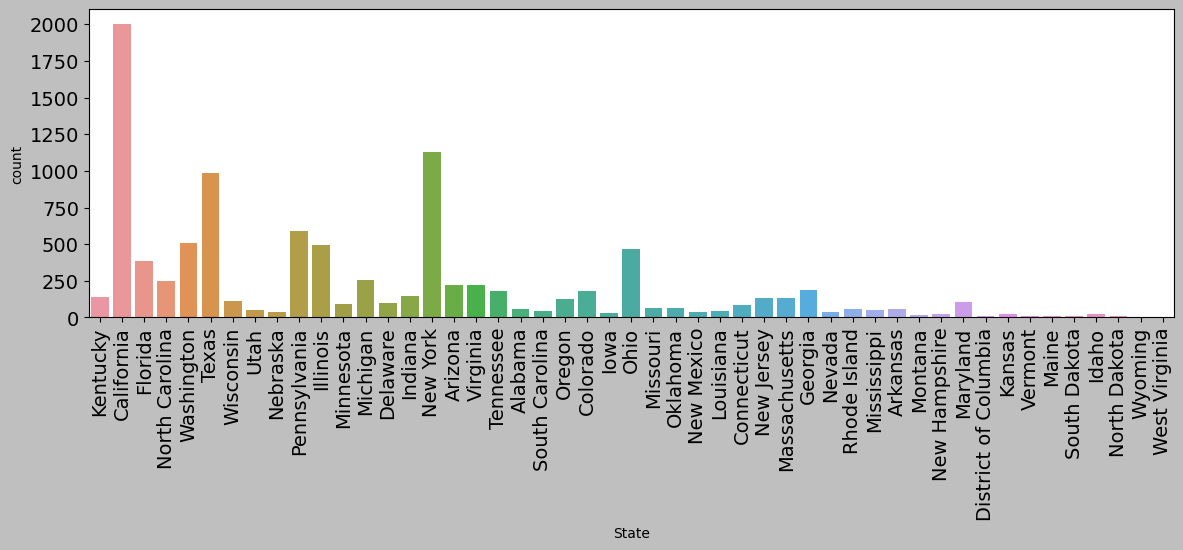

In [36]:
# we will plot countplot to Visualize the State
plt.figure(figsize=(14,4))
sns.countplot(x=df['State'])
plt.xticks(rotation=90,fontsize = 14)
plt.yticks(fontsize=14)
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Bookcases'),
  Text(1, 0, 'Chairs'),
  Text(2, 0, 'Labels'),
  Text(3, 0, 'Tables'),
  Text(4, 0, 'Storage'),
  Text(5, 0, 'Furnishings'),
  Text(6, 0, 'Art'),
  Text(7, 0, 'Phones'),
  Text(8, 0, 'Binders'),
  Text(9, 0, 'Appliances'),
  Text(10, 0, 'Paper'),
  Text(11, 0, 'Accessories'),
  Text(12, 0, 'Envelopes'),
  Text(13, 0, 'Fasteners'),
  Text(14, 0, 'Supplies'),
  Text(15, 0, 'Machines'),
  Text(16, 0, 'Copiers')])

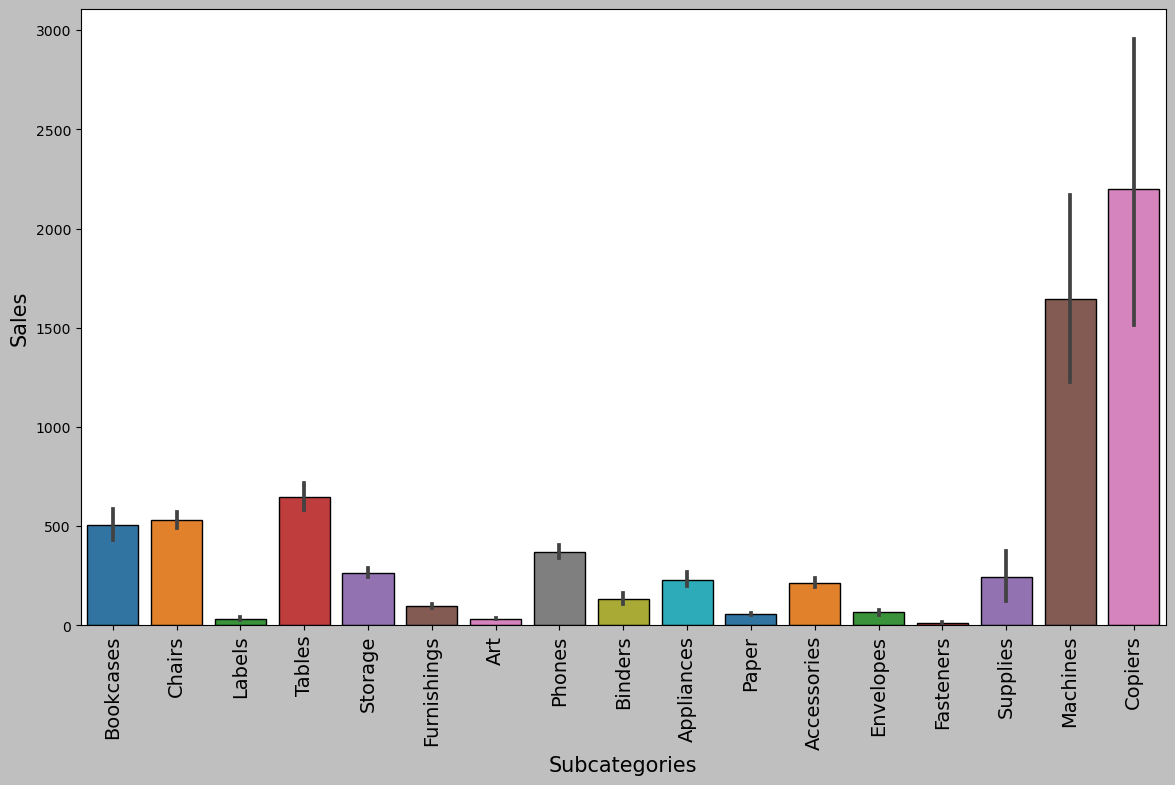

In [37]:
#We will plot barplot for Sub-Category and Sales
plt.figure(figsize=[14,8])
ax = sns.barplot(x="Sub-Category", y="Sales", data=df, palette="tab10",edgecolor='black')
plt.xlabel("Subcategories",fontsize=15)
plt.ylabel("Sales",fontsize=15)
plt.xticks(rotation=90,fontsize = 14)

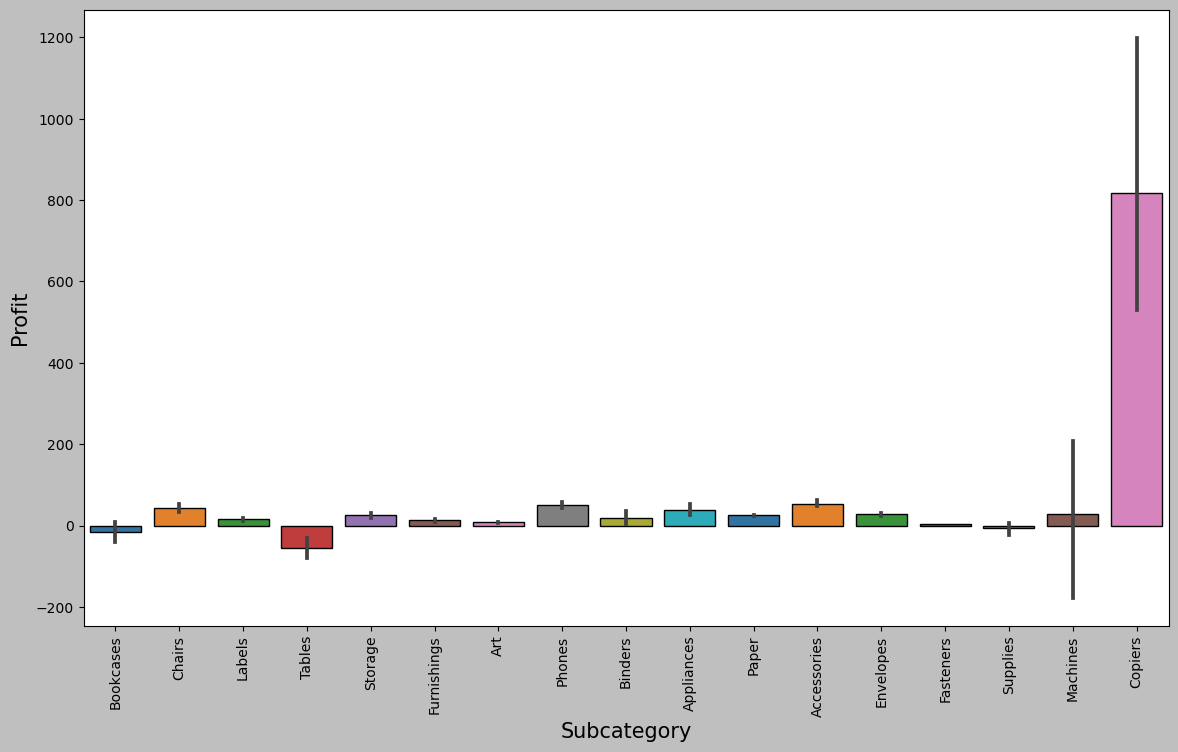

In [38]:
#We will plot barplot for Sub-Category and Profit
plt.figure(figsize=[14,8])
ax = sns.barplot(x="Sub-Category", y="Profit", data=df, palette="tab10",edgecolor='black')
plt.xlabel("Subcategory", fontsize=15)
plt.ylabel("Profit",fontsize=15)
plt.xticks(rotation=90)
plt.show()

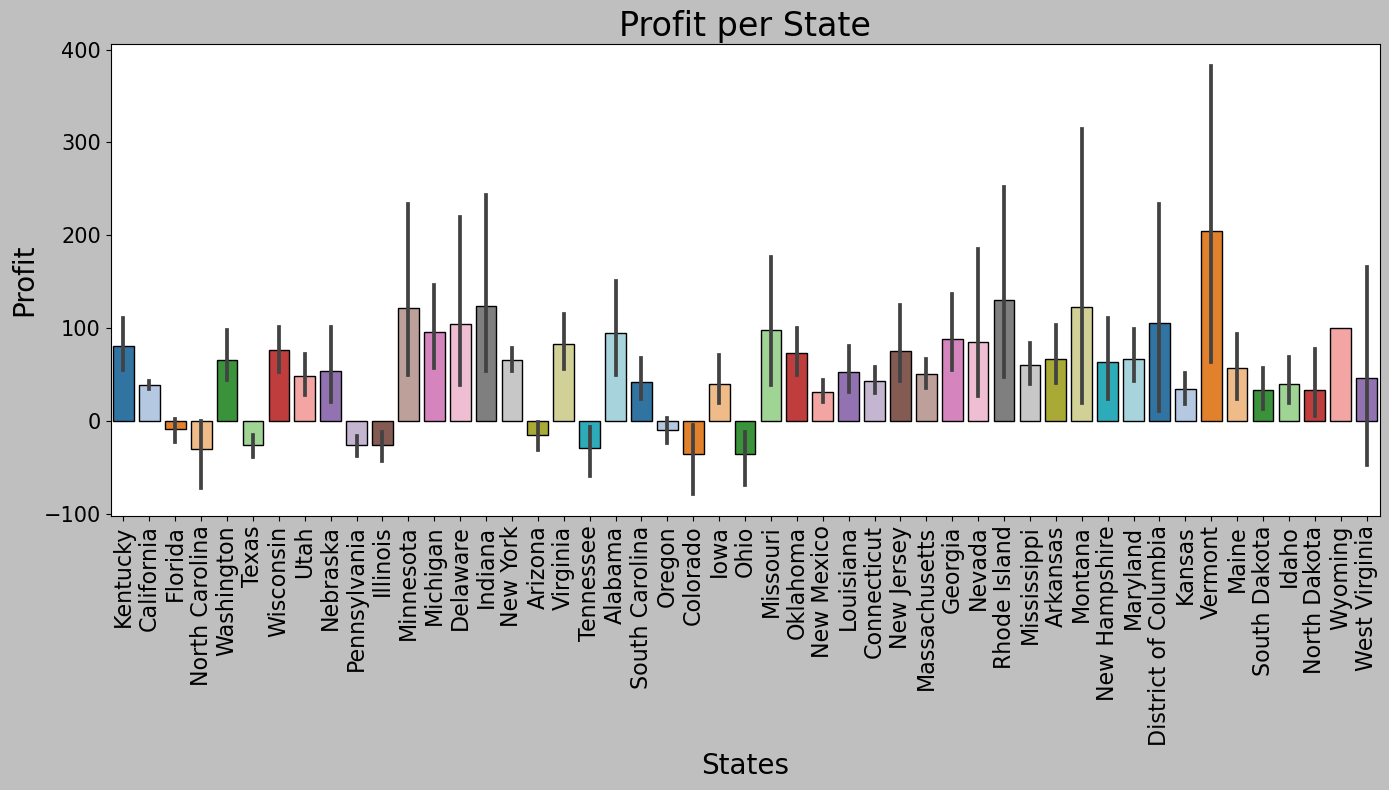

In [39]:
# we will plot Barplot for the Profit Per State
plt.figure(figsize=[14,8])
ax = sns.barplot(x="State", y="Profit", data=df, palette="tab20",edgecolor='black')
plt.xticks(rotation=90, fontsize=16)
plt.yticks(fontsize=15)
plt.title("Profit per State",fontsize=24)
plt.xlabel("States",fontsize=20)
plt.ylabel("Profit",fontsize=20)
plt.tight_layout()

In [40]:
a=df.groupby(['Category','Sub-Category']).Discount.agg('sum')
a

Category         Sub-Category
Furniture        Bookcases        48.14
                 Chairs          105.00
                 Furnishings     132.40
                 Tables           83.35
Office Supplies  Appliances       77.60
                 Art              59.60
                 Binders         567.00
                 Envelopes        20.40
                 Fasteners        17.80
                 Labels           25.00
                 Paper           102.60
                 Storage          63.20
                 Supplies         14.60
Technology       Accessories      60.80
                 Copiers          11.00
                 Machines         35.20
                 Phones          137.40
Name: Discount, dtype: float64

In [41]:
discounts=pd.pivot_table(df,index=('Category','Sub-Category'),values='Discount')
pd.DataFrame(discounts)

Discount
Category        Sub-Category          
Furniture       Bookcases     0.211140
                Chairs        0.170178
                Furnishings   0.138349
                Tables        0.261285
Office Supplies Appliances    0.166524
                Art           0.074874
                Binders       0.372292
                Envelopes     0.080315
                Fasteners     0.082028
                Labels        0.068681
                Paper         0.074891
                Storage       0.074704
                Supplies      0.076842
Technology      Accessories   0.078452
                Copiers       0.161765
                Machines      0.306087
                Phones        0.154556

<AxesSubplot:xlabel='Category,Sub-Category'>

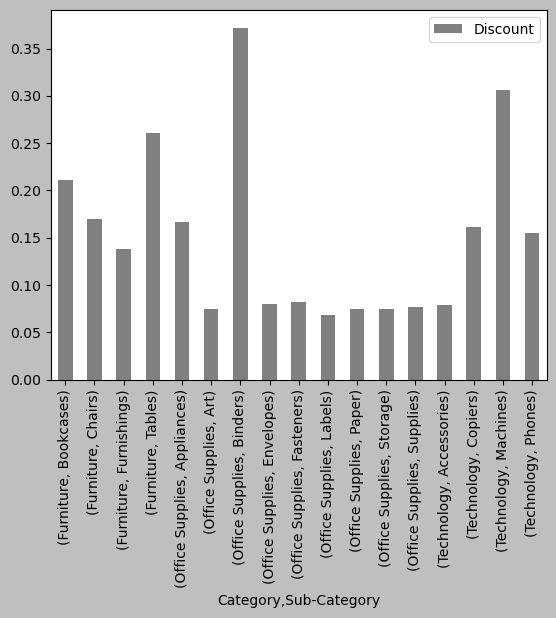

In [42]:
# We will Plot Barplot for Discount.
discounts.plot.bar(color='gray')


Conclusion:

1.Sales and profits are positively correlated.

2.Discount and Profits are Negatively correlated

3.According to Barplot of Sub-category the sales of Copiers and machines are more.

4.Technology gives more profit than furniture

5.Total sales in US is 2296195.5903.

6.Total profit in US is 286241.4226.

7.Total Discount in US is 1561.09.

8.We can conclude that people residing in the west region order more as compared to other regions,so in order to get more profit in this area we need to decrease the Discount on Furniture Category.
